In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs

In [2]:
M = np.zeros([9,9],dtype='complex')
M += np.random.random([9,9])
M = M+M.transpose()

M += np.random.random([9,9])*1j
M = M+M.transpose().conj()


funcs.is_hermitian_upto_a_phase(M)

True

In [3]:
np.random.seed(0)
A = np.random.normal(0,1,[9,9])
A = A@A.transpose()
X = funcs.sqrthm(A,1e-10)
assert (np.linalg.norm(X@X.transpose().conj()-A))<1e-5

In [4]:
np.random.seed(0)
A = np.random.random([3,3,4])
A = A+np.transpose(A,[1,0,2])
B = np.random.random([3,3,4])
B = B+np.transpose(B,[1,0,2])
MPS = iMPS.iMPS()
MPS.construct_from_tensor_list([A,B])

In [5]:
trans = MPS.transfer_matrix()
isinstance(trans,linalg.LinearOperator)
#isinstance(trans,np.ndarray)

True

In [6]:

trans = MPS.transfer_matrix()
vr = np.eye(MPS.chi[0])
vr = np.reshape(vr,[MPS.chi[0]**2,])
V = trans.dot(vr)
assert np.linalg.norm(V-vr*V[0]) <=1e-12, f'not right canonical, error = {np.linalg.norm(V-vr)}'


vl = MPS.s[0]@MPS.s[0].conj().transpose()
vl = np.reshape(vl,[MPS.chi[0]**2,])
V = trans.rmatvec(vl)
  
assert np.linalg.norm(V-vl*V[0]/vl[0]) <=1e-12, f'not left canonical, error = {np.linalg.norm(V-vl)}'
            

In [7]:
gammaB = MPS.B[1]
transB = funcs.col_contract33(gammaB,gammaB)
vr = np.eye(MPS.chi[0])
vr = np.reshape(vr,[MPS.chi[0]**2,])
V = trans.dot(vr)
assert np.linalg.norm(V-vr*V[0]) <=1e-12, f'not right canonical, error = {np.linalg.norm(V-vr)}'

gammaA = MPS.B[0]
transA = funcs.col_contract33(gammaA,gammaA)
vl = MPS.s[0]@MPS.s[0].conj().transpose()
vl = np.reshape(vl,[MPS.chi[0]**2,])
V = vl@transA
  
vl2 = MPS.s[1]@MPS.s[1].conj().transpose()
vl2 = np.reshape(vl2,[MPS.chi[1]**2,])
assert np.linalg.norm(V-vl2*V[0]/vl2[0]) <=1e-12, f'not left canonical, error = {np.linalg.norm(V-vr)}'

In [ ]:
V.shape

(144,)

Test on Toric code

/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


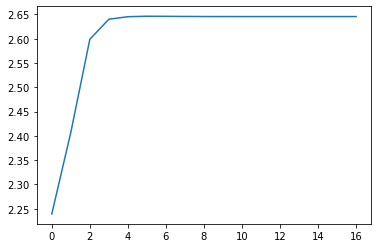

In [ ]:
for h in np.arange(0.3,0.301,0.01):
    trans = funcs.single_trans(h)
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans])

    B = np.zeros([1,1,4])
    B[0,0] =np.random.random([2,2]).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.construct_from_tensor_list([B])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,50)
    MPS_power.update(0,20)
    pyplot.plot(MPS_power.E_history)
    #print(MPS.transfer_matrix(0))
#B[1,1] = np.random.random([2,2]).reshape([4,])


In [9]:
eigs=[]

for h in np.arange(0.,0.3,0.01):   
    
    B = np.zeros([1,1,4])
    B[0,0] =np.array([[np.exp(h),0],[0,np.exp(-h)]]).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.construct_from_tensor_list([B])
    MPS.svd_threshold =1e-10
        
     
    trans = funcs.single_trans(h)
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,20)
    MPS_power.update(0,200)
    #print(MPS.chi[0])
    eigs.append(MPS_power.E_history[-1])

/Users/lizhuan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


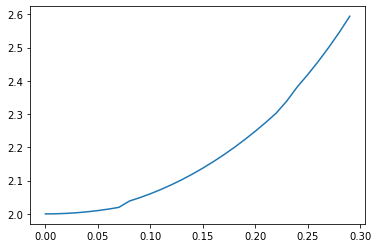

In [10]:
pyplot.plot(np.arange(0.,0.3,0.01),eigs)

In [ ]:
np.real(eigs)

array([2.        , 2.00040002, 2.00160053, 2.0036027 , 2.00640851,
       2.01002073, 2.0144429 , 2.01967926, 2.03860927, 2.0489312 ,
       2.06050623, 2.07334305, 2.08745589, 2.10285965, 2.11957171,
       2.13761089, 2.15699826, 2.17775724, 2.19991386, 2.22349706,
       2.24853914, 2.2750762 , 2.30314863, 2.33934178, 2.38179041,
       2.41878792, 2.45829855, 2.50051438, 2.54565177, 2.59395686])